In [60]:
import pandas as pd
import numpy as np
import math
from math import radians, cos, sin, asin, sqrt, floor, atan2, sqrt
from matplotlib import pyplot as plt
import seaborn as sns


# Reading the data

In [4]:
data_df = pd.read_json('geoLondonAug2020-1', lines=True)
print(data_df.head())
print(data_df.shape)

                   _id                               date         username  \
0  1289290528475906049  {'$date': '2020-07-31T20:03:10Z'}         markjg65   
1  1289290621782380544  {'$date': '2020-07-31T20:03:32Z'}          willwpw   
2  1289290626538672128  {'$date': '2020-07-31T20:03:33Z'}  _AndreaUrbanFoX   
3  1289290647669637120  {'$date': '2020-07-31T20:03:38Z'}     _JOSSCARTER_   
4  1289290936648781824  {'$date': '2020-07-31T20:04:47Z'}  JoFreemanMakeup   

                                                text  geoenabled  \
0  Sunset to die for \n\n#sunset #sunsetphotograp...        True   
1  This months LUSH Kitchen Subscription box is h...        True   
2  Beautiful sky over #bethnalgreen tonight. #Eas...        True   
3  VERY happy to finally see the sun go down. Tod...        True   
4  𝙷𝚊𝚙𝚙𝚢 𝙵𝚛𝚒𝚈𝚊𝚢 𝙱𝚎𝚊𝚞𝚝𝚒𝚎𝚜 , 𝚑𝚘𝚠 𝚑𝚊𝚜 𝚢𝚘𝚞𝚛 𝚠𝚎𝚎𝚔 𝚋𝚎𝚎𝚗...        True   

                                         coordinates  \
0  {'type': 'Point', 'coordinates': [-0.0936, 51....   
1  {'type'

In [5]:
print(data_df[['_id', 'text','coordinates']].head(10))

                   _id                                               text  \
0  1289290528475906049  Sunset to die for \n\n#sunset #sunsetphotograp...   
1  1289290621782380544  This months LUSH Kitchen Subscription box is h...   
2  1289290626538672128  Beautiful sky over #bethnalgreen tonight. #Eas...   
3  1289290647669637120  VERY happy to finally see the sun go down. Tod...   
4  1289290936648781824  𝙷𝚊𝚙𝚙𝚢 𝙵𝚛𝚒𝚈𝚊𝚢 𝙱𝚎𝚊𝚞𝚝𝚒𝚎𝚜 , 𝚑𝚘𝚠 𝚑𝚊𝚜 𝚢𝚘𝚞𝚛 𝚠𝚎𝚎𝚔 𝚋𝚎𝚎𝚗...   
5  1289291369089966080  Dimitri the machine Vs the downlight️️️ @ Berm...   
6  1289291681033060364  @DJChrisBerrow You clearly live somewhere more...   
7  1289291863334121473  Lammas views - stunning skies, a fox surprised...   
8  1289291982804680706  Magical sunset with magical people\n\n#sunset ...   
9  1289292060369928192  Got the skills to pay the bills  @ Bermondsey ...   

                                         coordinates  
0  {'type': 'Point', 'coordinates': [-0.0936, 51....  
1  {'type': 'Point', 'coordinates': [-0.10

In [6]:
data_df['coordinates'].apply(lambda c: str(c['coordinates'][0]) + str(c['coordinates'][1])).value_counts()

-0.1094000000000000151.5141    681
-0.0793943651.47496745          96
-0.127758351.5073509            16
-0.1648136451.5289252           15
-0.1166666751.5                 13
                              ... 
-0.2116666751.4875               1
-0.193241751.4566706             1
-0.1401851.388                   1
-0.2030671351.49759013           1
-0.152043751.52874409            1
Name: coordinates, Length: 565, dtype: int64

In [7]:
data_df[data_df['geoenabled'] == True]


,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1289290528475906049,{'$date': '2020-07-31T20:03:10Z'},markjg65,Sunset to die for \n\n#sunset #sunsetphotograp...,True,"{'type': 'Point', 'coordinates': [-0.0936, 51....","London, England","Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...","[sunset, sunsetphotography, summervibes, summe...",[],Instagram
1,1289290621782380544,{'$date': '2020-07-31T20:03:32Z'},willwpw,This months LUSH Kitchen Subscription box is h...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[LushKitchen],Instagram
2,1289290626538672128,{'$date': '2020-07-31T20:03:33Z'},_AndreaUrbanFoX,Beautiful sky over #bethnalgreen tonight. #Eas...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",stab city,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[bethnalgreen, EastLondon, sunset, heatwave, s...",[],Instagram
3,1289290647669637120,{'$date': '2020-07-31T20:03:38Z'},_JOSSCARTER_,VERY happy to finally see the sun go down. Tod...,True,"{'type': 'Point', 'coordinates': [-0.109400000...","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
4,1289290936648781824,{'$date': '2020-07-31T20:04:47Z'},JoFreemanMakeup,"𝙷𝚊𝚙𝚙𝚢 𝙵𝚛𝚒𝚈𝚊𝚢 𝙱𝚎𝚊𝚞𝚝𝚒𝚎𝚜 , 𝚑𝚘𝚠 𝚑𝚊𝚜 𝚢𝚘𝚞𝚛 𝚠𝚎𝚎𝚔 𝚋𝚎𝚎𝚗...",True,"{'type': 'Point', 'coordinates': [-0.109400000...","Here, there & everywhere. . .","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[FriYayFaves],[],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1289969232034160641,{'$date': '2020-08-02T17:00:06Z'},alextrafford,I'm at Battersea Park - @batterseapksw11 in Ba...,True,"{'type': 'Point', 'coordinates': [-0.15698433,...",London,"Wandsworth, London",United Kingdom,GB,"[[[-0.259465, 51.417277], [-0.127974, 51.41727...",[],[BatterseaPkSW11],Foursquare
1727,1289969307271610368,{'$date': '2020-08-02T17:00:23Z'},AdzAmo_,"08.08.20 https://t.co/H1pnrDxSpA @ London, Uni...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
1728,1289969342759579658,{'$date': '2020-08-02T17:00:32Z'},theldntea,Happy Sunday Beauts I have no idea where my w...,True,"{'type': 'Point', 'coordinates': [-0.109400000...","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],"[tartecosmetics, EylureOfficial]",Instagram
1729,1289969436674457602,{'$date': '2020-08-02T17:00:54Z'},antoninaparker,20 shots in one day. Half way mark is in sight...,True,"{'type': 'Point', 'coordinates': [-0.1653, 51....",London,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[ninasaucy],[],Instagram


In [9]:
data_df[data_df['coordinates'].apply(lambda c: str(c['coordinates'][0]) + str(c['coordinates'][1])) != 0]

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1289290528475906049,{'$date': '2020-07-31T20:03:10Z'},markjg65,Sunset to die for \n\n#sunset #sunsetphotograp...,True,"{'type': 'Point', 'coordinates': [-0.0936, 51....","London, England","Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...","[sunset, sunsetphotography, summervibes, summe...",[],Instagram
1,1289290621782380544,{'$date': '2020-07-31T20:03:32Z'},willwpw,This months LUSH Kitchen Subscription box is h...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[LushKitchen],Instagram
2,1289290626538672128,{'$date': '2020-07-31T20:03:33Z'},_AndreaUrbanFoX,Beautiful sky over #bethnalgreen tonight. #Eas...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",stab city,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[bethnalgreen, EastLondon, sunset, heatwave, s...",[],Instagram
3,1289290647669637120,{'$date': '2020-07-31T20:03:38Z'},_JOSSCARTER_,VERY happy to finally see the sun go down. Tod...,True,"{'type': 'Point', 'coordinates': [-0.109400000...","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
4,1289290936648781824,{'$date': '2020-07-31T20:04:47Z'},JoFreemanMakeup,"𝙷𝚊𝚙𝚙𝚢 𝙵𝚛𝚒𝚈𝚊𝚢 𝙱𝚎𝚊𝚞𝚝𝚒𝚎𝚜 , 𝚑𝚘𝚠 𝚑𝚊𝚜 𝚢𝚘𝚞𝚛 𝚠𝚎𝚎𝚔 𝚋𝚎𝚎𝚗...",True,"{'type': 'Point', 'coordinates': [-0.109400000...","Here, there & everywhere. . .","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[FriYayFaves],[],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,1289969232034160641,{'$date': '2020-08-02T17:00:06Z'},alextrafford,I'm at Battersea Park - @batterseapksw11 in Ba...,True,"{'type': 'Point', 'coordinates': [-0.15698433,...",London,"Wandsworth, London",United Kingdom,GB,"[[[-0.259465, 51.417277], [-0.127974, 51.41727...",[],[BatterseaPkSW11],Foursquare
1727,1289969307271610368,{'$date': '2020-08-02T17:00:23Z'},AdzAmo_,"08.08.20 https://t.co/H1pnrDxSpA @ London, Uni...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
1728,1289969342759579658,{'$date': '2020-08-02T17:00:32Z'},theldntea,Happy Sunday Beauts I have no idea where my w...,True,"{'type': 'Point', 'coordinates': [-0.109400000...","London, England","City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],"[tartecosmetics, EylureOfficial]",Instagram
1729,1289969436674457602,{'$date': '2020-08-02T17:00:54Z'},antoninaparker,20 shots in one day. Half way mark is in sight...,True,"{'type': 'Point', 'coordinates': [-0.1653, 51....",London,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[ninasaucy],[],Instagram


In [ ]:
radius = 6371 # radius of Earth

#Coordinates of London

long_min = -0.563
long_max = 0.28036
lat_min = 51.261318
lat_max = 51.686031

# Distribution of data

In [ ]:


def get_longitude(long1, long2, lat1, lat2):
    lon1, lon2, lat1, lat2 = map(radians, [long1,long2, lat1, lat2])
    long_dist = lon2 - lon1 
    lat_dist = 0
    a = sin(lat_dist/2)**2 + cos(lat1) * cos(lat2) * sin(long_dist/2)**2
    c = 2 * asin(sqrt(a)) 
    return radius * c
    
def get_latitude(lat1, lat2):
    lat1, lat2 = map(radians, [lat1, lat2])

    long_dist = 0 
    lat_dist = lat2 - lat1 
    a = sin(lat_dist/2)**2 + cos(lat1) * cos(lat2) * sin(long_dist/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a)) 
    return radius * c
    

In [26]:
grid_width = get_longitude(long_min, long_max, lat_min, lat_min)
grid_hight = get_latitude(lat_min, lat_max)
print (grid_width, grid_hight)

58.68267622835378 47.22593087999008


In [28]:
area = grid_width * grid_hight
print (area)



2771.3440114130726


In [30]:
def get_grid(long, lat):
    width = floor(get_longitude(long_min, long, lat_min, lat_min))
    height = floor(get_latitude(lat_min, lat))
    return height, width


In [33]:
print (get_grid(-0.06318212,51.49698006))

(26, 34)


In [35]:
row_max = 48
col_max = 59
grid = np.zeros((row_max, col_max))
print (grid.shape)


(48, 59)


In [37]:
for index, row in data_df.iterrows():
    coords = row['coordinates']['coordinates']
    h,w = get_grid(coords[0], coords[1])
    grid[h,w] += 1

# Heatmap to analyse the data distribution

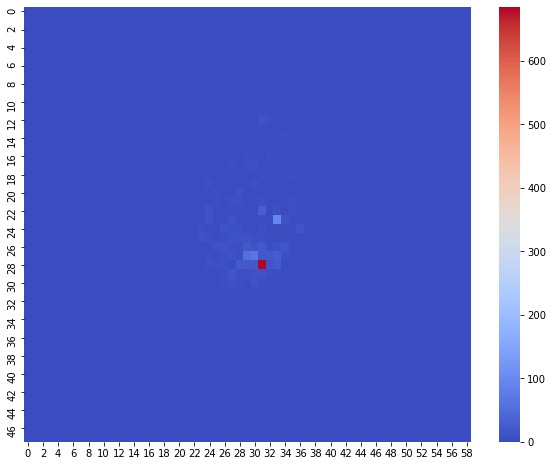

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(grid, cmap = "coolwarm")
plt.show()
